<a href="https://colab.research.google.com/github/naufalahnaf17/tensorflow_01_regression/blob/main/00_tensorflow_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengenalan awal tentang Tensorflow

### Ada beberapa yang bakal kita lakukan disini yaitu :
- kita akan menggunakan tensorflow -> untuk membuat model
- lalu kita juga akan menggunakan matplotlib -> untuk memvisualisasikan data yang kita gunakan
- setelah itu kita juga akan membuat model pertama kita menggunakan tensorflow
- lalu kita juga akan mengevaluasi model yang telah dibuat dengan tuning yang berbeda

### Algoritma yang kita akan gunakan yaitu Regression dan Evaluasi yang akan kita gunakan adalah MAE (Mean Absolute Error)

### Pertama tama kita akan melakukan import tensorflow dan matplotlib terlebih dahulu

In [29]:
# Import Tensorflow
import tensorflow as tf
# Import Matplotlib
import matplotlib.pyplot as plt

In [30]:
# Kita akan mengecek versi tensorflow terlebih dahulu, dengan begitu kita bisa tau versi tensorflow yang digunakan
print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.15.0


### Selanjutnya kita akan membuat data yang akan kita training, kali ini kita akan melakukan dengan data sederhana terlebih dahulu

In [31]:
# Kita akan membuat data X dan y
# Data X adalah data dari -100 hingga 100 dengan jarak masing masing adalah 4

X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [32]:
# Selanjutnya kita akan membuat data y
# Data y adalah data dari range X namun kita tambahkan 10
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

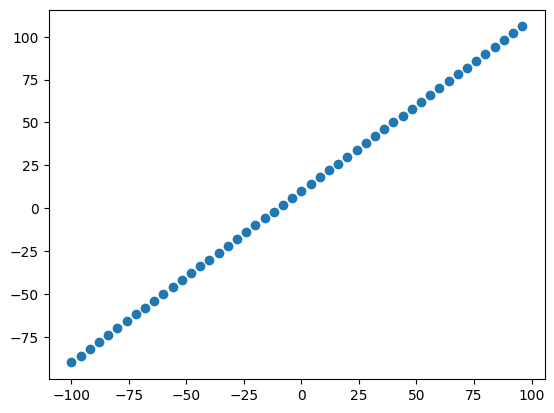

In [33]:
# Mari kita visualisasikan data X dan y secara sederhana terlebih dahulu
plt.scatter(X,y)

### Selanjutnya mari kita membuat model sederhana dengan tensorflow

Step by step untuk membuat model sederhana dengan tensorflow

1. Create Model -> define input dan output
2. Compile Model -> define loss function (loss dalam artian kita harus tau untuk evaluasi model yang telah kita buat seberapa bagus, dan juga kita bisa membuat evaluasi tentang model yang dibuat)
3. Fitting Model -> letting model find pattern dari X dan y (features dan labels)

In [34]:
X.ndim,y.ndim

(1, 1)

In [35]:
# Step 1 Create Model
# Untuk saat ini kita akan membuat model sederhana dengan 1 hidden layer tanpa activation
# Untuk model yang akan kita buat untuk saat ini adalah tf.keras.Sequential

# Untuk saat ini kita akan menggunakan set seed agar pelatihan model dan pengulangan terjadi secara sama
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Step 2 Compile Model
# Kita akan compile model sederhana yang kita buat dengan Loss dan Metrics MAE dan untuk optimizer kita akan menggunakan SGD (stochastic gradient descent)
model.compile(loss="mae",optimizer=tf.keras.optimizers.SGD(),metrics="mae")

# Step 3 Fitting Model
# Pada saat kita fit model seharusnya syntax nya seperti ini
# model.fit(X,y,epochs=5)
# Namun kita harus sedikit memodifikasi karna ndim x dan y hanya 1 sedangkan minimal ndim seharusnya ada 2
# Epochs adalah lap seperti dalam balapan -> jadi model yang kita buat ini akan melakukan 5 putaran untuk mempelajari data yang ada
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
2/2 [==============================] - 1s 17ms/step - loss: 89.5995 - mae: 89.5995
Epoch 2/5
2/2 [==============================] - 0s 12ms/step - loss: 39.9558 - mae: 39.9558
Epoch 3/5
2/2 [==============================] - 0s 10ms/step - loss: 10.2509 - mae: 10.2509
Epoch 4/5
2/2 [==============================] - 0s 12ms/step - loss: 10.2497 - mae: 10.2497
Epoch 5/5
2/2 [==============================] - 0s 23ms/step - loss: 12.3078 - mae: 12.3078


In [36]:
# Melakukan predict
# Sebelum itu mari kita lihat data X dan y terlebih dahulu
X,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [37]:
# Bisa dilihat dari data diatas masing masing kita bisa langsung tahu bahwa dari angka n ke angka ke depan adalah 4
# Jadi kalau kita melakukan prediksi angka 100, maka harusnya y nya adalah 110
model.predict([100])

1/1 [==============================] - 0s 86ms/step


array([[67.70777]], dtype=float32)

In [38]:
# Ternyata model nya masih terlalu buruk karna seharusnya pada saat kita memasukan angka 100 jawaban yang seharusnya adalah 110

### Model pertama sudah berhasil dibuat, namun hasilnya sedikit mengecewakan karna jauh dari jawaban yang seharusnya

pada section kali ini mari kita sedikit evaluasi model yang telah kita buat, ada beberapa cara untuk mengevaluasi model yang telah kita buat

Creating Model (Step 1) :
- Kita bisa menambahkan layer dan menaikan number dari layer itu sendiri (neuron) contoh -> **tf.keras.layers.Dense(100,activation="relu")**

Compile Model (Step 2) :
- Kita juga bisa menggunakan optimizer berbeda dan menambahkan learning rate dari optimizer function contoh : -> model.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics="mae")

Fitting Model (Step 3) :
- Kita juga bisa menambahkan lap (epochs) pada model yang kita buat, walaupun lebih lama dalam melakukan training bisa jadi memungkinkan bahwa dengan menaikan epochs kita bisa mendapatkan hasil yang lebih maksimal
- Atau bisa juga dengan menambahkan data X dan y

In [39]:
# Mari kita buat ulang model seperti diatas
# Pada percobaan pertama kita akan menambahkan Epochs terlebih dahulu menjadi 100

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",optimizer=tf.keras.optimizers.SGD(),metrics="mae")

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 15ms/step - loss: 11.1302 - mae: 11.1302
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 11.5814 - mae: 11.5814
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 11.0470 - mae: 11.0470
Epoch 4/100
2/2 [==============================] - 0s 14ms/step - loss: 10.1041 - mae: 10.1041
Epoch 5/100
2/2 [==============================] - 0s 21ms/step - loss: 15.4462 - mae: 15.4462
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 11.7407 - mae: 11.7407
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 9.2311 - mae: 9.2311
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 11.9866 - mae: 11.9866
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 10.0324 - mae: 10.0324
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 10.0788 - mae: 10.0788
Epoch 11/100
2/2 [==============================] - 0s

In [40]:
# Mari kita lihat terlebih dahulu X dan y
X,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [41]:
# Seharusnya saat kita memasukan angka 100, jawaban yang benar adalah 110, mari kita coba
model.predict([100])

1/1 [==============================] - 0s 230ms/step


array([[90.79854]], dtype=float32)

In [42]:
# Masih jauh dari harapan, namun setidaknya membaik, maka dari itu mari kita coba membuat model dengan hidden layer yang lebih banyak dan kita buat juga dengan activation='relu'
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",optimizer=tf.keras.optimizers.SGD(),metrics="mae")

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 21ms/step - loss: 32.0047 - mae: 32.0047
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 13.8329 - mae: 13.8329
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 21.0424 - mae: 21.0424
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 12.1666 - mae: 12.1666
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 13.2446 - mae: 13.2446
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 20.0468 - mae: 20.0468
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 9.9628 - mae: 9.9628
Epoch 8/100
2/2 [==============================] - 0s 14ms/step - loss: 14.6997 - mae: 14.6997
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 18.6103 - mae: 18.6103
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 10.9734 - mae: 10.9734
Epoch 11/100
2/2 [==============================] - 0

In [43]:
# Mari kita coba predict
model.predict([100])

# Ternyata hasilnya malah lebih buruk, mari kita coba gunakan activation=None

1/1 [==============================] - 0s 293ms/step


array([[74.6853]], dtype=float32)

In [44]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",optimizer=tf.keras.optimizers.SGD(),metrics="mae")

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 2s 34ms/step - loss: 50.5773 - mae: 50.5773
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 29.8689 - mae: 29.8689
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 28.5057 - mae: 28.5057
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 25.5427 - mae: 25.5427
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 24.5440 - mae: 24.5440
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 20.1249 - mae: 20.1249
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 20.4480 - mae: 20.4480
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 19.6785 - mae: 19.6785
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 17.9998 - mae: 17.9998
Epoch 10/100
2/2 [==============================] - 0s 15ms/step - loss: 21.0774 - mae: 21.0774
Epoch 11/100
2/2 [==============================]

In [45]:
# Mari kita coba predict (saat input 100 output seharusnya adalah 110)
model.predict([100])

1/1 [==============================] - 0s 155ms/step


array([[69.12443]], dtype=float32)

In [46]:
# Sekarang mari kita coba menggunakan optimizer yang berbeda, kali ini kita akan menggunakan optimizer adam
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(),metrics="mae")

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 24ms/step - loss: 54.5962 - mae: 54.5962
Epoch 2/100
2/2 [==============================] - 0s 22ms/step - loss: 52.9965 - mae: 52.9965
Epoch 3/100
2/2 [==============================] - 0s 14ms/step - loss: 51.5999 - mae: 51.5999
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 50.0853 - mae: 50.0853
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 48.5840 - mae: 48.5840
Epoch 6/100
2/2 [==============================] - 0s 15ms/step - loss: 47.1176 - mae: 47.1176
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 45.5873 - mae: 45.5873
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 44.1104 - mae: 44.1104
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 42.7300 - mae: 42.7300
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 41.2090 - mae: 41.2090
Epoch 11/100
2/2 [==============================]

In [47]:
# Mae terlihat bagus, namun mari kita coba predict
model.predict([100])

1/1 [==============================] - 0s 227ms/step


array([[94.0594]], dtype=float32)

In [48]:
# Sudah hampir medekati, mari kita tingkatkan learning rate dengan optimizer Adam
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics="mae")

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 2s 12ms/step - loss: 52.9214 - mae: 52.9214
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 35.3133 - mae: 35.3133
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 20.1463 - mae: 20.1463
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 10.3703 - mae: 10.3703
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 13.5323 - mae: 13.5323
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 16.5677 - mae: 16.5677
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 13.8773 - mae: 13.8773
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.9895 - mae: 9.9895
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 8.9273 - mae: 8.9273
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 9.1534 - mae: 9.1534
Epoch 11/100
2/2 [==============================] - 0s 6ms/step 

In [49]:
# MAE nya sangat baik, tapi mari kita lihat hasil prediksi dari model yang sudah di training
model.predict([100])

1/1 [==============================] - 0s 69ms/step


array([[107.017044]], dtype=float32)

In [50]:
# Model sudah lebih baik, mari kita tuning sedikit lagi learning rate nya
# Sudah hampir medekati, mari kita tingkatkan learning rate dengan optimizer Adam
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics="mae")

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 35.9796 - mae: 35.9796
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 18.0854 - mae: 18.0854
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1296 - mae: 10.1296
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 13.8283 - mae: 13.8283
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 15.6189 - mae: 15.6189
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 12.1275 - mae: 12.1275
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4800 - mae: 9.4800
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0137 - mae: 9.0137
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4470 - mae: 9.4470
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0318 - mae: 9.0318
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - 

In [51]:
model.predict([100])

# Sofar hasil nya cukup memuaskan

1/1 [==============================] - 0s 59ms/step


array([[111.39394]], dtype=float32)

### Sekarang Waktunya Visulize Model yang telah kita buat

- buat data menjadi split (X_train,y_train,X_test,y_test)
- buat prediksi menjadi variable y_preds
- format yang akan digunakan dalam split (80% train, 20% test)

In [52]:
len(X),len(y)

(50, 50)

In [53]:
# Buat Train dan Test
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

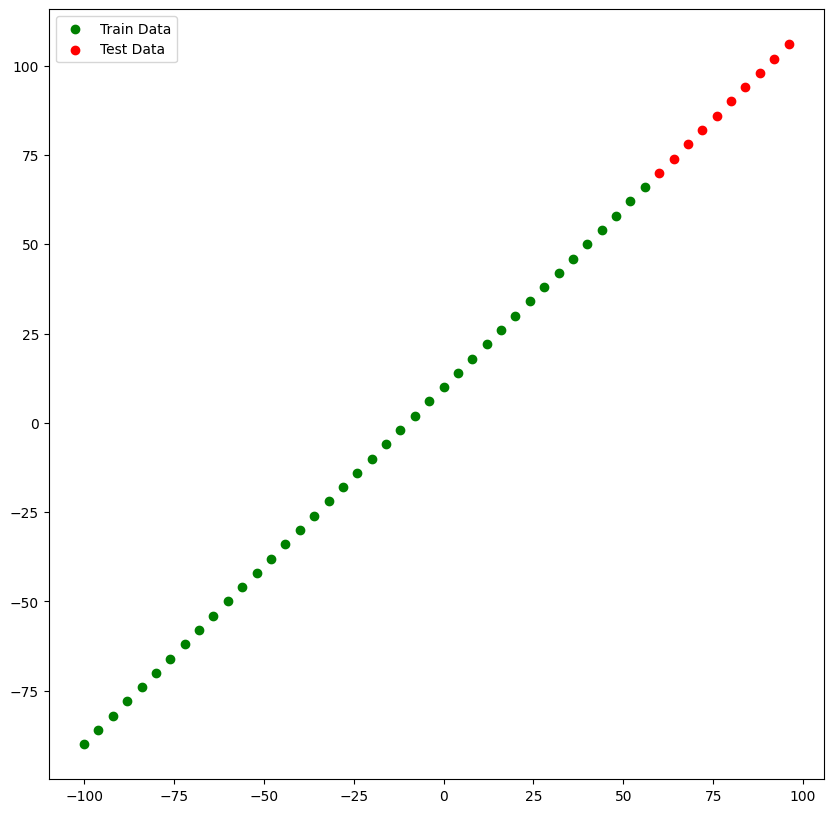

In [55]:
# Visualisasikan dengan matplotlib data train dan data test
plt.figure(figsize=(10,10))
plt.scatter(X_train,y_train,c='g')
plt.scatter(X_test,y_test,c='r')
plt.legend(["Train Data","Test Data"])

In [70]:
# Membuat Model dengan data yang sudah di split
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),metrics="mae")
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 38.0203 - mae: 38.0203
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 15.9855 - mae: 15.9855
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 6.7910 - mae: 6.7910
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 8.5176 - mae: 8.5176
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 6.7034 - mae: 6.7034
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 10.3230 - mae: 10.3230
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 4.4367 - mae: 4.4367
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 6.3628 - mae: 6.3628
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 6.1094 - mae: 6.1094
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 4.8846 - mae: 4.8846
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - loss:

In [71]:
model.predict([100])

1/1 [==============================] - 0s 70ms/step


array([[112.81613]], dtype=float32)

In [73]:
# Mari kita visualisasikan hasil prediksi model yang telah di buat dengan membandingkan data train dan test

y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 61ms/step


array([[ 71.66569],
       [ 75.78067],
       [ 79.89565],
       [ 84.01063],
       [ 88.12557],
       [ 92.24057],
       [ 96.35568],
       [100.47079],
       [104.5859 ],
       [108.70101]], dtype=float32)

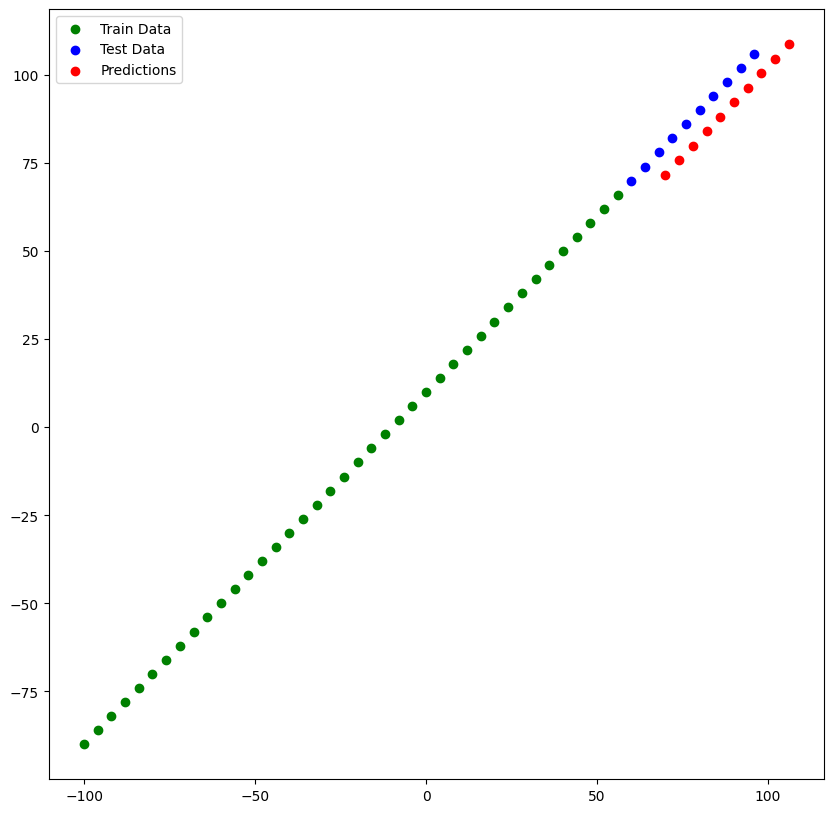

In [75]:
plt.figure(figsize=(10,10))
plt.scatter(X_train,y_train,c='g',label="Train Data")
plt.scatter(X_test,y_test,c='b',label="Test Data")
plt.scatter(y_test,y_pred,c='r',label="Predictions")
plt.legend()

In [ ]:
# Sejauh ini model yang telah di buat sepertinya masih belum terlalu akurat